# Import required libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import numpy as np
import pandas as pd
from tensorflow import keras as k
from keras.utils import np_utils
import cv2
from PIL import Image
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Flatten, Conv2D, Dropout, Dense

In [2]:
X=[]
y=[]
for dirname, _, filenames in os.walk('samples'):
    for filename in filenames:
        path=os.path.join(dirname, filename) 
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        kernel = np.ones((5,5),np.uint8)
        image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
        kernel = np.ones((2,2),np.uint8)
        image = cv2.dilate(image, kernel, iterations = 1)
        image = cv2.GaussianBlur(image, (5,5), 0)
        x=[image[10:50,30:50],image[10:50,50:70],
                 image[10:50,70:90],image[10:50,90:110],image[10:50,110:130]]
        for i in range(5):
            X.append(img_to_array(Image.fromarray(x[i])))
            y.append(path[len(path)-9:len(path)-4][i])
X=np.array(X)
y=np.array(y)

# Scaling X values; Label Encoding and One Hot Encoding the labels

In [3]:
X=X.astype('float32')
X/=255

y_le = LabelEncoder().fit_transform(y)
y_ohe = OneHotEncoder(sparse = False).fit_transform(y_le.reshape(len(y_le),1))

X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size = 0.2, random_state = 42)

row, col = X.shape[1],X.shape[2]
categories = y_ohe.shape[1]

info = {y_le[i] : y[i] for i in range(len(y))}

# Creating the CNN architecture

In [4]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same', input_shape=(row,col,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(categories))
model.add(Activation("softmax"))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam' ,
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 20, 16)        160       
                                                                 
 activation (Activation)     (None, 40, 20, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 10, 16)        2320      
                                                                 
 activation_1 (Activation)   (None, 20, 10, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 5, 16)        0         
 2D)                                                    

# Fitting and training data into model

In [5]:
batch_size = 150
epochs = 200

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

Epoch 1/200
29/29 [==============================] - 5s 54ms/step - loss: 2.9086 - accuracy: 0.0967 - val_loss: 2.8114 - val_accuracy: 0.1159
Epoch 2/200
29/29 [==============================] - 0s 10ms/step - loss: 2.3974 - accuracy: 0.2579 - val_loss: 1.9331 - val_accuracy: 0.4140
Epoch 3/200
29/29 [==============================] - 0s 9ms/step - loss: 1.8018 - accuracy: 0.4675 - val_loss: 1.4050 - val_accuracy: 0.6308
Epoch 4/200
29/29 [==============================] - 0s 9ms/step - loss: 1.4476 - accuracy: 0.5827 - val_loss: 1.1755 - val_accuracy: 0.6776
Epoch 5/200
29/29 [==============================] - 0s 9ms/step - loss: 1.2318 - accuracy: 0.6470 - val_loss: 1.0033 - val_accuracy: 0.7402
Epoch 6/200
29/29 [==============================] - 0s 9ms/step - loss: 1.0910 - accuracy: 0.6871 - val_loss: 0.9261 - val_accuracy: 0.7374
Epoch 7/200
29/29 [==============================] - 0s 10ms/step - loss: 1.0092 - accuracy: 0.7096 - val_loss: 0.8134 - val_accuracy: 0.7729
Epoch 8/20

29/29 [==============================] - 0s 9ms/step - loss: 0.3302 - accuracy: 0.8846 - val_loss: 0.5206 - val_accuracy: 0.8757
Epoch 59/200
29/29 [==============================] - 0s 9ms/step - loss: 0.3072 - accuracy: 0.8965 - val_loss: 0.5149 - val_accuracy: 0.8729
Epoch 60/200
29/29 [==============================] - 0s 9ms/step - loss: 0.3236 - accuracy: 0.8886 - val_loss: 0.5256 - val_accuracy: 0.8748
Epoch 61/200
29/29 [==============================] - 0s 9ms/step - loss: 0.3165 - accuracy: 0.8871 - val_loss: 0.5212 - val_accuracy: 0.8701
Epoch 62/200
29/29 [==============================] - 0s 9ms/step - loss: 0.3154 - accuracy: 0.8902 - val_loss: 0.4824 - val_accuracy: 0.8729
Epoch 63/200
29/29 [==============================] - 0s 10ms/step - loss: 0.3016 - accuracy: 0.8930 - val_loss: 0.4754 - val_accuracy: 0.8757
Epoch 64/200
29/29 [==============================] - 0s 9ms/step - loss: 0.3111 - accuracy: 0.8862 - val_loss: 0.5017 - val_accuracy: 0.8748
Epoch 65/200
29/29

29/29 [==============================] - 0s 13ms/step - loss: 0.2113 - accuracy: 0.9203 - val_loss: 0.5293 - val_accuracy: 0.8785
Epoch 116/200
29/29 [==============================] - 0s 13ms/step - loss: 0.2298 - accuracy: 0.9180 - val_loss: 0.5056 - val_accuracy: 0.8832
Epoch 117/200
29/29 [==============================] - 0s 13ms/step - loss: 0.2096 - accuracy: 0.9215 - val_loss: 0.5367 - val_accuracy: 0.8710
Epoch 118/200
29/29 [==============================] - 0s 13ms/step - loss: 0.2223 - accuracy: 0.9164 - val_loss: 0.5258 - val_accuracy: 0.8729
Epoch 119/200
29/29 [==============================] - 0s 13ms/step - loss: 0.2094 - accuracy: 0.9259 - val_loss: 0.5014 - val_accuracy: 0.8729
Epoch 120/200
29/29 [==============================] - 0s 14ms/step - loss: 0.1971 - accuracy: 0.9278 - val_loss: 0.5001 - val_accuracy: 0.8804
Epoch 121/200
29/29 [==============================] - 0s 13ms/step - loss: 0.2237 - accuracy: 0.9215 - val_loss: 0.4937 - val_accuracy: 0.8850
Epoch 

29/29 [==============================] - 0s 10ms/step - loss: 0.1675 - accuracy: 0.9393 - val_loss: 0.5581 - val_accuracy: 0.8804
Epoch 173/200
29/29 [==============================] - 0s 10ms/step - loss: 0.1612 - accuracy: 0.9402 - val_loss: 0.5361 - val_accuracy: 0.8804
Epoch 174/200
29/29 [==============================] - 0s 10ms/step - loss: 0.1702 - accuracy: 0.9423 - val_loss: 0.5168 - val_accuracy: 0.8944
Epoch 175/200
29/29 [==============================] - 0s 10ms/step - loss: 0.1698 - accuracy: 0.9360 - val_loss: 0.5395 - val_accuracy: 0.8785
Epoch 176/200
29/29 [==============================] - 0s 12ms/step - loss: 0.1649 - accuracy: 0.9404 - val_loss: 0.5280 - val_accuracy: 0.8832
Epoch 177/200
29/29 [==============================] - 0s 12ms/step - loss: 0.1875 - accuracy: 0.9315 - val_loss: 0.5325 - val_accuracy: 0.8664
Epoch 178/200
29/29 [==============================] - 0s 12ms/step - loss: 0.1706 - accuracy: 0.9350 - val_loss: 0.5038 - val_accuracy: 0.8935
Epoch 

# Evaluating performance of the model

In [6]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

34/34 [==============================] - 0s 7ms/step - loss: 0.5558 - accuracy: 0.8850
Test loss: 0.555781364440918
Test accuracy: 0.8850467205047607


# Prediction:

In [16]:
def pred (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    image = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
    kernel = np.ones((5,5),np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.GaussianBlur(image, (5,5), 0)
    
    
    x = [image[10:50, 30:50], image[10:50, 50:70], image[10:50, 70:90],
                  image[10:50, 90:110], image[10:50, 110:130]]
    
    X_pred = []
    for i in range(5) :
        X_pred.append(img_to_array(Image.fromarray(x[i])))
    
    X_pred = np.array(X_pred)
    X_pred/= 255.0
    
    y_pred = model.predict(X_pred)
    y_pred = np.argmax(y_pred, axis = 1)
    
    print('Prediction: ', end='')
    for res in y_pred :
        print(info[res], end='')
    '''
    print('\n\n')
    print(info)
    print('\n\n')
    '''
    print('\nActual:    ', img_path[len(img_path)-9:len(img_path)-4])

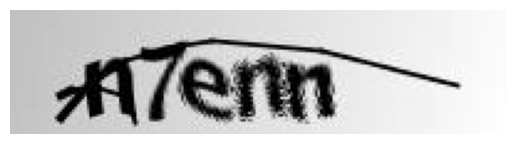

1/1 [==============================] - 0s 19ms/step
Prediction: n7enn
Actual:     n7enn


In [17]:
pred('samples/n7enn.png')

In [9]:
model.save('captcha_recognizer.h5')